### 1. Import Libraries & Data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Establish path
path = r'/Users/claireheger/Documents/Instacart Basket Analysis' 

In [4]:
# Import Data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customer_merge_.pkl'))

### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Frequency')

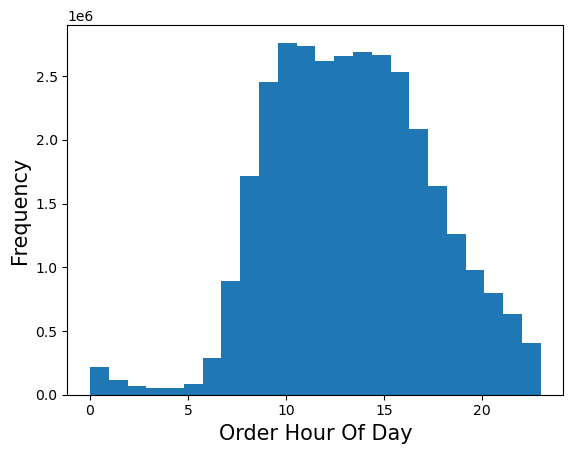

In [5]:
# Histogram
hist = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24) #24hours 
plt.xlabel("Order Hour Of Day", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

#### The histogram shows the peak hous of ordering are about 9am - 4pm. There is a slight increase in orders starting around 6am up until a peak at 10am. Orders are steady until 4pm. After 4pm, the orders more steadily decrease until midnight and bottom out until 6am again. 

In [6]:
# Export visual
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_order_hour_of_day.png'))

### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0.5, 1.0, 'Number of Orders by Loyalty')

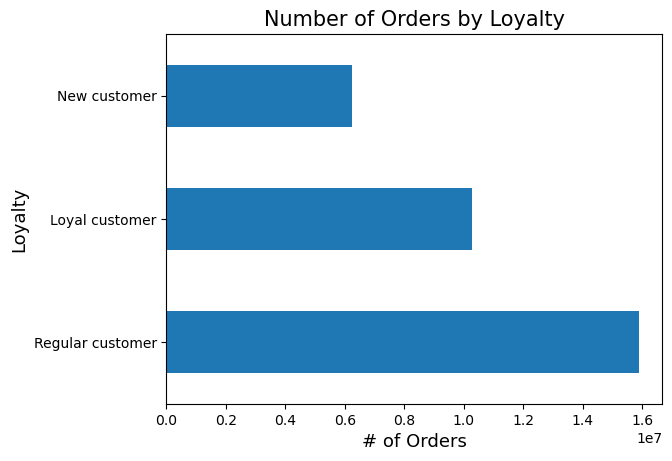

In [7]:
# Bar chart
bar= ords_prods_merge['loyalty_flag'].value_counts()
bar= bar.plot(kind='barh') 
plt.xlabel("# of Orders", fontsize=13)
plt.ylabel("Loyalty", fontsize=13)  
plt.title("Number of Orders by Loyalty", fontsize=15)


#### Regular customers are the largest customer segment

In [8]:
# Export visualization 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'loyalty_number_orderes.png'))

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
# Make sample 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [10]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [11]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev] 

In [12]:
# Count the number of rows
len(big)+ len(small)

32404859

In [13]:
len(ords_prods_merge)

32404859

In [35]:
# Create a subset only containing columns 'prices' and 'order hour of day'
df_2 = small[['prices', 'order_hour_of_day']]

Text(0.5, 1.0, 'Price of Orders by Day')

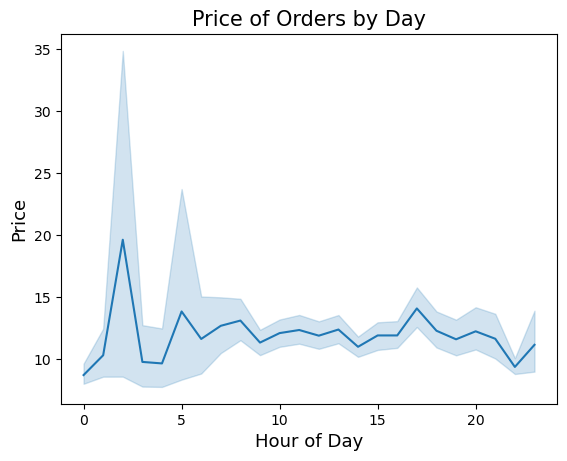

In [37]:
# Create a line graph
line_price_hour = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.xlabel("Hour of Day", fontsize=13)
plt.ylabel("Price", fontsize=13)  
plt.title("Price of Orders by Day", fontsize=15)

#### No correlation between the price of items and the hour in which they are purchased. 

In [32]:
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'order_hour.png'))

### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

Text(0.5, 1.0, 'Number of Users by Marital Status')

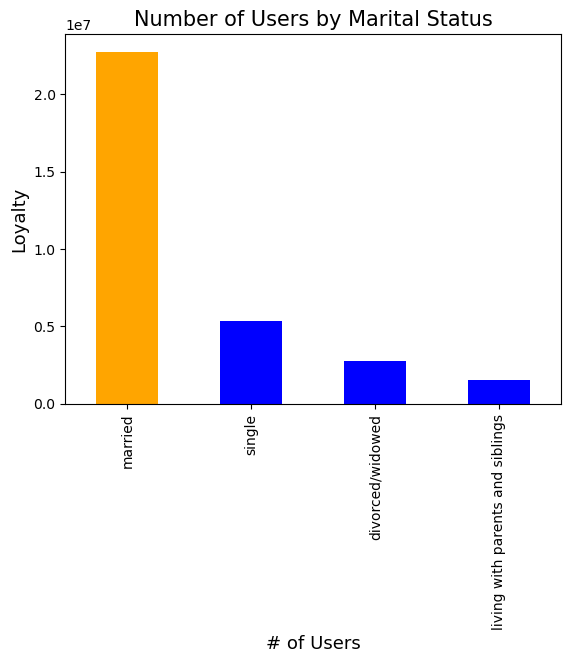

In [16]:
# Create bar chart to find the distribution of marital status from 'fam_status'
marital_status = ords_prods_merge['fam_status'].value_counts().plot.bar(color = ['orange', 'blue', 'blue', 'blue'])
plt.xlabel("# of Users", fontsize=13)
plt.ylabel("Loyalty", fontsize=13)  
plt.title("Number of Users by Marital Status", fontsize=15)

In [17]:
# Export the visualization
marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_marital_status.png'))

#### Married users make up the most Instacart Users

In [18]:
# Create a subset of 'n_dependants' and 'age'
df_2 = small[['n_dependants', 'age']]

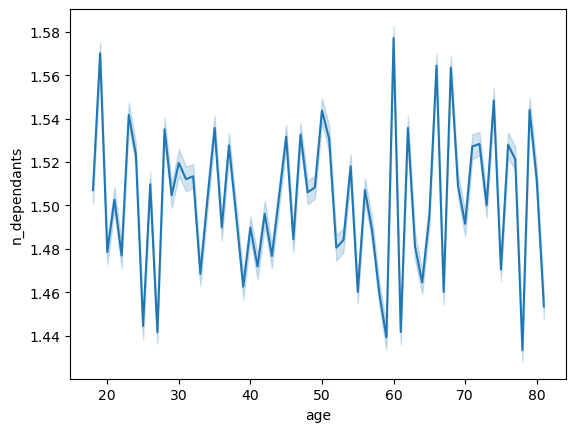

In [19]:
line_dependants_age = sns.lineplot(data = df_2, x = 'age',y = 'n_dependants')

#### No connection between number of dependants and age

In [20]:
# Export the visualization
line_dependants_age.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'line_dependants_age.png'))

### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.



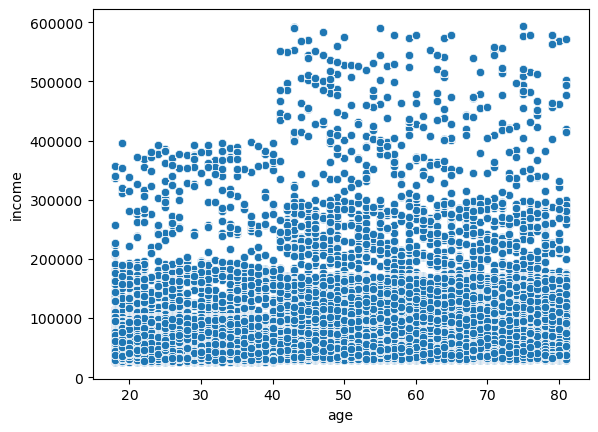

In [21]:
# Create scatterplot
age_income_scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_merge)

#### After 40, income level passes $400,000

In [22]:
# Export the visualization 
age_income_scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'age_income_scatter_plot.png'))

In [23]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 37 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   Unnamed: 0.1           int64   
 1   Unnamed: 0_x           int64   
 2   order_id               int64   
 3   user_id                int64   
 4   eval_set               object  
 5   order_number           int64   
 6   orders_day_of_week     int64   
 7   order_hour_of_day      int64   
 8   days_since_last_order  float64 
 9   uder_id                int64   
 10  product_id             int64   
 11  add_to_cart_order      int64   
 12  reordered              int64   
 13  Unnamed: 0_y           int64   
 14  product_name           object  
 15  aisle_id               int64   
 16  department_id          int64   
 17  prices                 float64 
 18  _merge                 category
 19  busiest_day            object  
 20  busiest_days           object  
 21  busiest_period_of_day  object

Text(0.5, 1.0, 'Number of Orders by Day')

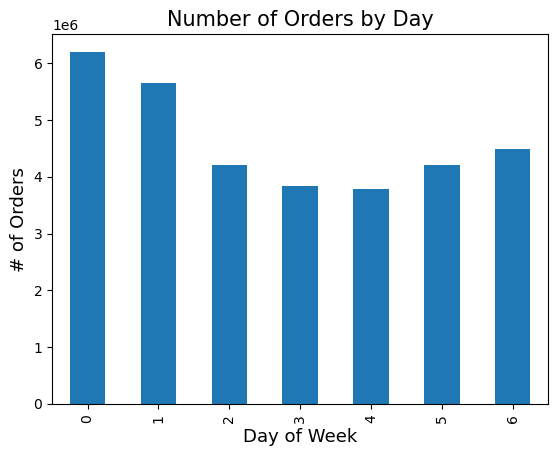

In [30]:
# Orders per day of week 
bar_dow = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel("Day of Week", fontsize=13)
plt.ylabel("# of Orders", fontsize=13)  
plt.title("Number of Orders by Day", fontsize=15)

In [31]:
# Export the visualization 
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'ords_dow.png'))

Text(0.5, 1.0, 'Frequency of Prices')

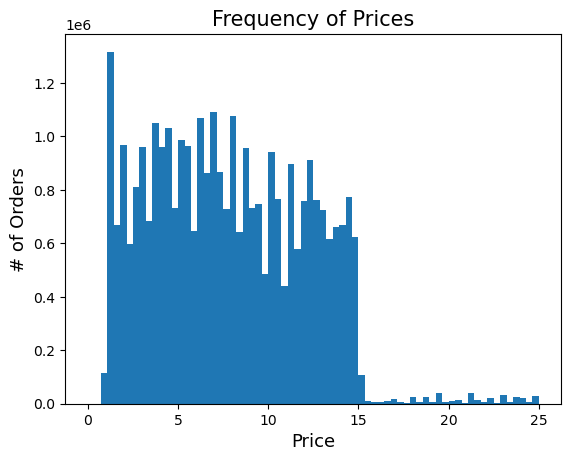

In [41]:
#histogram for frequency of prices 
hist_prices = ords_prods_merge['prices'].plot.hist(bins = 70, range = [0 ,25])
plt.xlabel("Price", fontsize=13)
plt.ylabel("# of Orders", fontsize=13)  
plt.title("Frequency of Prices", fontsize=15)

In [ ]:
# Bar Graph for Price Groupings
bar_price_group = opm['price_range'].value_counts()
bar_price_group = bar_price_group.plot(kind='bar', color='#9a5c8c')
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders (Millions)", fontsize=12)  
plt.title("Orders by Price-Range", fontsize=14)
plt.show()